<a href="https://colab.research.google.com/github/smomtahen/LinearRegression/blob/master/concentration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [0]:
#df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/data.csv')
df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/01.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/02.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/03.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/04.csv')
#df = pd.read_csv('https://raw.githubusercontent.com/tofighi/Public/master/data/05.csv')

df

,concentration,instrumant readings
0,0,0.04
1,15,0.08
2,80,0.23
3,250,0.57
4,500,0.97
5,1000,1.31


In [0]:
df2 = df[['concentration','instrumant readings']]
df2

,concentration,instrumant readings
0,0,0.04
1,15,0.08
2,80,0.23
3,250,0.57
4,500,0.97
5,1000,1.31


In [0]:
def p(x):
    return 6*x**5 - 2*x**4 +3 * x**2 + 2 * x + 1

In [0]:
np.random.seed(145837)


In [0]:
N = 7
var = 10**-1

left = -1
right = 3



xs = stats.uniform.rvs(left, right, size=N)
eps = stats.norm.rvs(0, np.sqrt(var), size=N)
ys = p(xs) + eps


In [0]:
xs = df2['concentration']
print(xs)
ys = df2['instrumant readings']
print(ys)

0       0
1      15
2      80
3     250
4     500
5    1000
Name: concentration, dtype: int64
0    0.04
1    0.08
2    0.23
3    0.57
4    0.97
5    1.31
Name: instrumant readings, dtype: float64


In [0]:
scaler = StandardScaler()
scaler.fit(df2)
df2_norm=scaler.transform(df2)
df2_norm

array([[-0.86870675, -1.04542092],
       [-0.82633081, -0.96065706],
       [-0.64270174, -0.64279259],
       [-0.1624411 ,  0.0777002 ],
       [ 0.54382455,  0.92533879],
       [ 1.95635585,  1.64583158]])

In [0]:
#with normalization
xs = df2_norm[:,[0]].ravel()
print(xs)
ys = df2_norm[:,[1]].ravel()
print(ys)

[-0.86870675 -0.82633081 -0.64270174 -0.1624411   0.54382455  1.95635585]
[-1.04542092 -0.96065706 -0.64279259  0.0777002   0.92533879  1.64583158]


In [0]:
#without normalization
xs = df2['concentration']
print(xs)
ys = df2['instrumant readings']
print(ys)

0       0
1      15
2      80
3     250
4     500
5    1000
Name: concentration, dtype: int64
0    0.04
1    0.08
2    0.23
3    0.57
4    0.97
5    1.31
Name: instrumant readings, dtype: float64


In [0]:

left = np.min(xs)-1
right = np.max(xs)+1


In [0]:
class PolynomialRegression(BaseEstimator):
    def __init__(self, deg=None):
        self.deg = deg
    
    def fit(self, X, y, deg=None):
        self.model = LinearRegression(fit_intercept=False)
        self.model.fit(np.vander(X, N=self.deg + 1), y)
    
    def predict(self, x):
        return self.model.predict(np.vander(x, N=self.deg + 1))
    
    @property
    def coef_(self):
        return self.model.coef_

In [0]:
known_degree_model = PolynomialRegression(deg=3)
known_degree_model.fit(xs, ys)
known_degree_model.coef_

array([-1.42745610e-10, -9.55951427e-07,  2.36549880e-03,  4.32611522e-02])

In [0]:
overfit_model = PolynomialRegression(deg=N - 1)
overfit_model.fit(xs, ys)

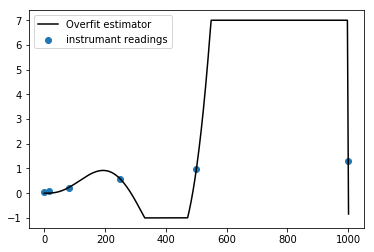

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)

plot_xs = np.linspace(left, right, (right - left) * 100)

ax.scatter(xs, ys);
ax.plot(plot_xs, np.clip(overfit_model.predict(plot_xs), -1, 7), color='k', label='Overfit estimator');
#ax.plot(plot_xs, p(plot_xs), color='r', label='True polynomial');
ax.legend(loc=2);

In [0]:
mean_squared_error(overfit_model.predict(xs), ys)


0.0012680662479902854

In [0]:
N_prediction = 10

prediction_xs = stats.uniform.rvs(left, right, size=N_prediction)
prediction_eps = stats.norm.rvs(0, np.sqrt(var), size=N_prediction)
prediction_ys = p(prediction_xs) + prediction_eps

mean_squared_error(overfit_model.predict(prediction_xs), prediction_ys)

1.446504647792458e+30

In [0]:
estimator = PolynomialRegression()
degrees = np.arange(1, 25)
cv_model = GridSearchCV(estimator,
                        cv=3,
                        param_grid={'deg': degrees},
                        scoring='neg_mean_squared_error')
cv_model.fit(xs, ys);


In [0]:
cv_model.best_params_, cv_model.best_estimator_.coef_

({'deg': 2}, array([-1.16007531e-06,  2.42933853e-03,  4.13591261e-02]))

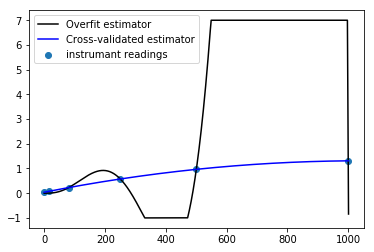

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(xs, ys);
ax.plot(plot_xs, np.clip(overfit_model.predict(plot_xs), -1, 7), color='k', label='Overfit estimator');
plt.plot(plot_xs, cv_model.predict(plot_xs), color='b', label='Cross-validated estimator');
#ax.plot(plot_xs, p(plot_xs), color='r', label='True polynomial');
ax.legend(loc=2);

In [0]:
mean_squared_error(cv_model.predict(xs), ys)


1.0912578139271386e-05

In [0]:
mean_squared_error(cv_model.predict(prediction_xs), prediction_ys)


1.4465046477925547e+30

Text(0.5, 0, 'Polynomial Degree')

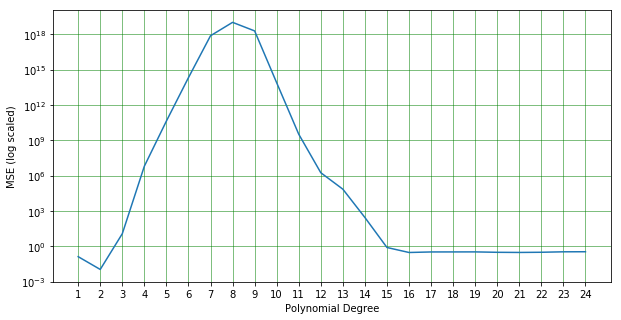

In [0]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

cv_model.cv_results_

#scores = np.array([mean_test_score in cv_model.cv_results_])
scores= cv_model.cv_results_['mean_test_score']

ax.plot(degrees, -scores)
plt.xticks(np.arange(1, np.max(degrees)+1, step=1))
plt.grid(color='g', linestyle='-', linewidth=.5)
ax.set_yscale('log')
ax.set_ylabel('MSE (log scaled)')
ax.set_xlabel('Polynomial Degree')